# Data Processing Pipeline
*Client: Royal Perth Hospital*

*Team: Group 7*

# Readme
The following libraries need to be installed in order to run the source code.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import sys
from importlib import reload

sys.path.append(os.path.abspath(os.path.join('..')))
sys.path.append(os.path.abspath(os.path.join('../src')))
from src import utils as utils
reload(utils)
from src import load_parquet as load_df
reload(load_df)

ROOT_DIR = Path('../..')
import src.DataLoader as DataLoader
reload(DataLoader)

dataLoader = DataLoader.DataLoader(ROOT_DIR)

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 1.Dataset Processing

Load the dataset. The following tables are loaded for this project:
- LABEVENTS
- MICROBIOLOGYEVENTS
- D_ICD_DIAGNOSES
- D_ITEMS

In [2]:
df_desc_icd, df_desc_labitems, df_desc_items = dataLoader.load_descriptions()

The DIAGNOSES_ICD tables has a column ICD9_CODE which is the code for each disease diagnosed for the patient.

- The Sepsis has 6 codes: ['77181', '99591', '99592', '67020', '67022', '67024']

- We'll introduce a new column, IS_SEPSIS, as a binary classifier (1 for 6 sepsis ICD9 codes, 0 otherwise) for the target variable.

In [3]:
df_diagnoses_icd = dataLoader.load_diagnoses_icd(df_desc_icd)

The Demographic dataframe is a combination of the patient and admission datasets. Adding some columns:
- AGE: the age of the patient at the admitted year
- IS_SEPSIS: indicating whether this is a sepsis case or not


The labevents dataframe is loaded. Admissions under 18 years old are removed

In [4]:
df_demographic = dataLoader.load_demographic(df_diagnoses_icd)

Removed 8210 admissions with AGE < 18


We replace those with aged > 100 by the median age of patients

In [5]:
df_demographic = dataLoader.demographic_clean_AGE(df_demographic)

The labevents dataframe is loaded. The records of admissions under 18 years old are removed.
- The empty HADM_ID is this are cleaned

In [6]:
df_labevents = dataLoader.load_labevents(df_demographic)

Calculate the TIME from for labevents from ADMITTIME to CHARTTIME
- A column NEW_ADMITTIME is added: if CHARTTIME < ADMITTIME, the NEW_ADMITTIME is the CHARTTIME, otherwise, use the ADMITTIME

In [76]:
df_labevents = dataLoader.labevents_compute_TIME(df_labevents, df_demographic)
# utils.save_csv(df_labevents, ROOT_DIR / 'data/labevents_cleaned.csv')

d:\Kha\UWA\CITS5553\sepsis_prediction\data-science-capstone-project\Kha Huynh\Data cleansing\DataLoader.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_admittime.loc[:, 'NEW_ADMITTIME'] = np.where(new_admittime.CHARTTIME < new_admittime.ADMITTIME, new_admittime.CHARTTIME, new_admittime.ADMITTIME)


# 2. Create train data

In [56]:
dataLoader.create_train_data(df_labevents, df_demographic, df_desc_labitems, hours=0, feature_no=20)

In [ ]:
dataLoader.create_train_data(df_labevents, df_demographic, df_desc_labitems, hours=2, feature_no=20)

In [74]:
dataLoader.create_train_data(df_labevents, df_demographic, df_desc_labitems, hours=4, feature_no=20)

In [70]:
df_final = dataLoader.create_train_data_sequence(df_labevents, df_demographic, df_desc_labitems, 4)

In [7]:
hours = 0
features = 20
df_final = dataLoader.create_train_data_sequence_new(df_labevents, df_demographic, df_desc_labitems, hours=hours, feature_no=features, output_filename = ROOT_DIR / f'data/Model input data/t{hours}_nan.csv')

In [44]:
hours = 1
features = 20
df_final = dataLoader.create_train_data_sequence_new(df_labevents, df_demographic, df_desc_labitems, hours=hours, feature_no=features, output_filename = ROOT_DIR / f'data/Model input data/t{hours}_nan.csv')

In [46]:
hours = 2
features = 20
df_final = dataLoader.create_train_data_sequence_new(df_labevents, df_demographic, df_desc_labitems, hours=hours, feature_no=features, output_filename = ROOT_DIR / f'data/Model input data/t{hours}_nan.csv')

In [48]:
hours = 3
features = 20
df_final = dataLoader.create_train_data_sequence_new(df_labevents, df_demographic, df_desc_labitems, hours=hours, feature_no=features, output_filename = ROOT_DIR / f'data/Model input data/t{hours}_nan.csv')

In [49]:
hours = 4
features = 20
df_final = dataLoader.create_train_data_sequence_new(df_labevents, df_demographic, df_desc_labitems, hours=hours, feature_no=features, output_filename = ROOT_DIR / f'data/Model input data/t{hours}_nan.csv')

In [50]:
hours = 8
features = 20
df_final = dataLoader.create_train_data_sequence_new(df_labevents, df_demographic, df_desc_labitems, hours=hours, feature_no=features, output_filename = ROOT_DIR / f'data/Model input data/t{hours}_nan.csv')

In [72]:
df_final = dataLoader.extract_train_data_by_features(df_labevents, df_demographic, df_desc_labitems, 4, ROOT_DIR / 'data/potential_labevents_count_with_proportion.csv', 20)

In [122]:
itemID = ["ITEMID_51222", "ITEMID_51221", "ITEMID_51279", "ITEMID_50931", "ITEMID_51301", "ITEMID_51256", "ITEMID_51274", 
          "ITEMID_50970", "ITEMID_51006", "ITEMID_50893", "ITEMID_51244", "ITEMID_50902", "ITEMID_50882", "ITEMID_50821", 
          "ITEMID_51265", "ITEMID_51248", "ITEMID_51275", "ITEMID_51277", "ITEMID_50820", "ITEMID_50818", "ITEMID_50885", "ITEMID_50912"]
dataLoader.convert_itemid_to_title(itemID, df_desc_labitems)

{'ITEMID_51222': 'Hemoglobin (51222)',
 'ITEMID_51221': 'Hematocrit (51221)',
 'ITEMID_51279': 'Red Blood Cells (51279)',
 'ITEMID_50931': 'Glucose (50931)',
 'ITEMID_51301': 'White Blood Cells (51301)',
 'ITEMID_51256': 'Neutrophils (51256)',
 'ITEMID_51274': 'PT (51274)',
 'ITEMID_50970': 'Phosphate (50970)',
 'ITEMID_51006': 'Urea Nitrogen (51006)',
 'ITEMID_50893': 'Calcium, Total (50893)',
 'ITEMID_51244': 'Lymphocytes (51244)',
 'ITEMID_50902': 'Chloride (50902)',
 'ITEMID_50882': 'Bicarbonate (50882)',
 'ITEMID_50821': 'pO2 (50821)',
 'ITEMID_51265': 'Platelet Count (51265)',
 'ITEMID_51248': 'MCH (51248)',
 'ITEMID_51275': 'PTT (51275)',
 'ITEMID_51277': 'RDW (51277)',
 'ITEMID_50820': 'pH (50820)',
 'ITEMID_50818': 'pCO2 (50818)',
 'ITEMID_50885': 'Bilirubin, Total (50885)',
 'ITEMID_50912': 'Creatinine (50912)'}

# Create Sequential data

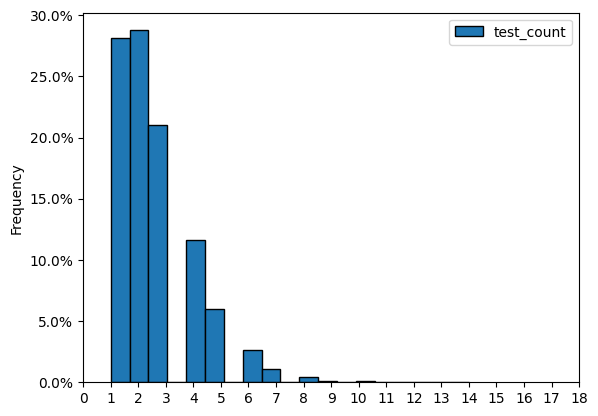

In [115]:
temp = df_labevents.drop_duplicates(['SUBJECT_ID', 'HADM_ID', 'CHARTTIME'])

test_count_within4h = temp[temp.TIME<=4].groupby(['SUBJECT_ID', 'HADM_ID']).apply(lambda x: len(x)).reset_index(name='test_count')
test_count_within4h.test_count = test_count_within4h.test_count.astype(int)
test_count_within4h.plot(kind='hist', y='test_count', weights=np.ones(len(test_count_within4h)) / len(test_count_within4h),\
                         xticks=list(range(0, 19)), \
       edgecolor='black', bins=19)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [ ]:
temp = df_labevents.drop_duplicates(['SUBJECT_ID', 'HADM_ID', 'TIME', 'CHARTTIME'])
temp = temp.merge(df_demographic[['SUBJECT_ID', 'HADM_ID', 'IS_SEPSIS']])
tests_count = temp.groupby(['SUBJECT_ID', 'HADM_ID', 'TIME', 'IS_SEPSIS']).size().reset_index(name='row_count')

count_8h = tests_count[(tests_count.TIME <= 8) & (tests_count.IS_SEPSIS==1)]

for t in range(0, 9):
  count_8h[count_8h.TIME == t].plot(kind='hist', y='row_count', weights=np.ones(len(count_8h[count_8h.TIME == t])) / len(count_8h[count_8h.TIME == t]), \
                                  xticks=list(range(0, 10)), bins=11, layout=(1,2), title=f"t{t}")
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [ ]:
import sweetviz as sv
import numpy as np, warnings
np.warnings = warnings

df_final = df_final.reindex(columns=df_final.columns)

df_final.iteritems = df_final.items

analysis = sv.analyze(df_final)
analysis.show_notebook()